In [331]:
import nltk
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Working with Three Books

My final task involved adding a third author's (Jane Austen) works into the fray. I figured then it may not be as easy for the SVM to split, and this was far more real world than only considering two authors. Again, my workflow was pretty much the same as the past two notebooks, except that Jane Austen was now included.

## Importing the Books

In [22]:
with open('dickens/david_copperfield.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    david_copperfield = contents.lower()

In [23]:
len(david_copperfield)

1968607

In [24]:
with open('dickens/christmas_carol.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    christmas_carol = contents.lower()

In [25]:
len(christmas_carol)

161714

In [26]:
with open('dickens/great_expectations.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    great_expectations = contents.lower()

In [27]:
len(great_expectations)

1013793

In [28]:
with open('dickens/oliver_twist.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    oliver_twist = contents.lower()

In [29]:
len(oliver_twist)

910807

In [30]:
with open('dickens/a_tale_of_two_cities2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    tale_of_two_cities = contents.lower()

In [31]:
len(tale_of_two_cities)

771153

In [32]:
with open('doyle/adventures_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    adventures_of_sherlock_holmes = contents.lower()

In [33]:
len(adventures_of_sherlock_holmes)

574456

In [34]:
with open('doyle/hound_of_the_baskervilles.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    hound_of_the_baskervilles = contents.lower()

In [35]:
len(hound_of_the_baskervilles)

326505

In [36]:
with open('doyle/memoirs_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    memoirs_of_sherlock_holmes = contents.lower()

In [37]:
len(memoirs_of_sherlock_holmes)

482873

In [38]:
with open('doyle/return_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    return_of_sherlock_holmes = contents.lower()

In [39]:
len(return_of_sherlock_holmes)

621091

In [40]:
with open('doyle/sign_of_four.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    sign_of_four = contents.lower()

In [41]:
len(sign_of_four)

237817

In [42]:
with open('doyle/study_in_scarlet.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    study_in_scarlet = contents.lower()

In [43]:
len(study_in_scarlet)

243836

In [44]:
with open('austen/emma.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    emma = contents.lower()

In [45]:
len(emma)

899263

In [46]:
with open('austen/northanger_abbey.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    na = contents.lower()

In [47]:
len(na)

440766

In [48]:
with open('austen/persuasion.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    persuasion = contents.lower()

In [49]:
len(persuasion)

475128

In [50]:
with open('austen/pride_and_prejudice.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    pap = contents.lower()

In [51]:
len(pap)

697753

In [52]:
with open('austen/sense_and_sensibility.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    sas = contents.lower()

In [53]:
len(sas)

686253

## Tokenizing

In [54]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [55]:
acc = tokenize(christmas_carol)
dc = tokenize(david_copperfield)
ge = tokenize(great_expectations)

In [56]:
ot = tokenize(oliver_twist)
atotc = tokenize(tale_of_two_cities)

In [57]:
aosh = tokenize(adventures_of_sherlock_holmes)

In [58]:
asis = tokenize(study_in_scarlet)
tsof = tokenize(sign_of_four)
rosh = tokenize(return_of_sherlock_holmes)
mosh = tokenize(memoirs_of_sherlock_holmes)
hotb = tokenize(hound_of_the_baskervilles)

In [59]:
pap_t = tokenize(pap)
sas_t = tokenize(sas)
emma_t = tokenize(emma)
na_t = tokenize(na)
persuasion_t = tokenize(persuasion)

In [60]:
print "Tokens in: acc", len(acc)
print "Tokens in: dc", len(dc)
print "Tokens in: ge", len(ge)
print "Tokens in: ot", len(ot)
print "Tokens in: atotc", len(atotc)
print "Tokens in: aosh", len(aosh)
print "Tokens in: asis", len(asis)
print "Tokens in: tsof", len(tsof)
print "Tokens in: rosh", len(rosh)
print "Tokens in: mosh", len(mosh)
print "Tokens in: hotb", len(hotb)
print "Tokens in: pap", len(pap_t)
print "Tokens in: sas", len(sas_t)
print "Tokens in: emma", len(emma_t)
print "Tokens in: na", len(na_t)
print "Tokens in: persuasion", len(persuasion_t)

Tokens in: acc 35659
Tokens in: dc 431374
Tokens in: ge 225422
Tokens in: ot 193897
Tokens in: atotc 166258
Tokens in: aosh 125571
Tokens in: asis 51501
Tokens in: tsof 51615
Tokens in: rosh 134861
Tokens in: mosh 104626
Tokens in: hotb 69961
Tokens in: pap 143409
Tokens in: sas 141339
Tokens in: emma 191626
Tokens in: na 91545
Tokens in: persuasion 97841


## Visualizations

In [223]:
austen_total = 143409 + 141339 + 191626 + 91545 + 97841
dickens_total = 35659 + 431374 + 225422 + 193897 + 166258
doyle_total = 125571 + 51501 + 51615 + 134861 + 104626 + 69961

### First Attempt Just Used Matplotlib

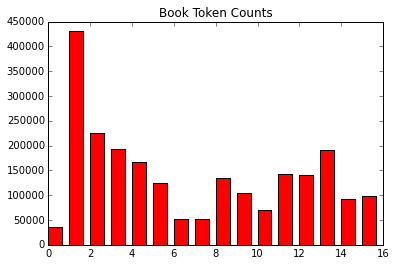

In [332]:
#https://plot.ly/matplotlib/bar-charts/
N = len(bar_y)
bar_y = [35659, 431374, 225422, 193897, 166258, 125571, 51501, 51615, 134861, 
         104626, 69961, 143409, 141339, 191626, 91545, 97841]
bar_x = range(N)
width = 1/1.5
plt.title("Book Token Counts")
plt.bar(bar_x, bar_y, width, color="red");

### Next Was Using a Data Frame to Get Better Labeling

In [250]:
d = {'acc': 35659, 'dc': 431374, 'ge': 225422, 'ot': 193897, 'atotc': 166258,
'aosh': 125571, 'asis': 51501, 'tsof': 51615, 'rosh': 134861, 'mosh': 104626,
'hotb': 69961, 'pap': 143409, 'sas': 141339, 'emma': 191626, 'na': 91545, 'persuasion': 97841}

In [252]:
authors = np.array(["dickens", "doyle", "doyle", "dickens", "dickens", "austen", "dickens", "doyle", 
                   "doyle", "austen", "dickens", "austen", "austen", "doyle", "austen", "doyle"])

In [253]:
length_Series = pd.Series(d)
mini_df = pd.DataFrame(length_Series)
mini_df.rename(columns={0: 'length'}, inplace=True)
mini_df['author'] = authors
mini_df

,length,author
acc,35659,dickens
aosh,125571,doyle
asis,51501,doyle
atotc,166258,dickens
dc,431374,dickens
emma,191626,austen
ge,225422,dickens
hotb,69961,doyle
mosh,104626,doyle
na,91545,austen


### A Much Cleaner-Looking Graph

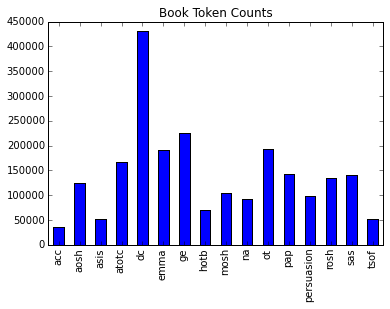

In [254]:
mini_df['length'].plot(kind='bar');
plt.title("Book Token Counts");

### Pie Chart

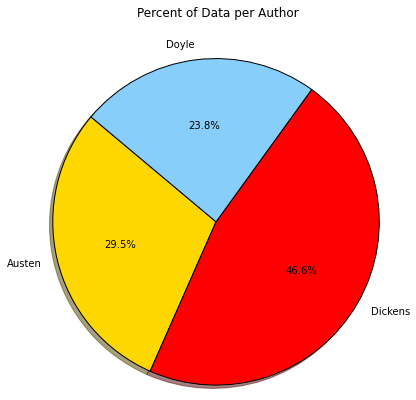

In [256]:
# https://pythonspot.com/matplotlib-pie-chart/

labels = 'Austen', 'Dickens', 'Doyle'
sizes = [austen_total, dickens_total, doyle_total]
colors = ['gold', 'red', 'lightskyblue']
 
plt.figure(figsize = (6,6))

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
plt.title("Percent of Data per Author", y=1.1)
plt.axis('equal')
plt.show()

### Chunking my Books

In [272]:
#http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks-in-python
def chunks(l, n):
    n = max(1, n)
    return [l[i:i + n] for i in range(0, len(l), n)]

In [273]:
acc_chunks = chunks(acc, 5000)
dc_chunks = chunks(dc, 5000)
ge_chunks = chunks(ge, 5000)
ot_chunks = chunks(ot, 5000)
atotc_chunks = chunks(atotc, 5000)
aosh_chunks = chunks(aosh, 5000)
asis_chunks = chunks(asis, 5000)
tsof_chunks = chunks(tsof, 5000)
rosh_chunks = chunks(rosh, 5000)
mosh_chunks = chunks(mosh, 5000)
hotb_chunks = chunks(hotb, 5000)
pap_chunks = chunks(pap_t, 5000)
sas_chunks = chunks(sas_t, 5000)
emma_chunks = chunks(emma_t, 5000)
na_chunks = chunks(na_t, 5000)
persuasion_chunks = chunks(persuasion_t, 5000)

In [274]:
acc_chunks = acc_chunks[0:len(acc_chunks)-1]
dc_chunks = dc_chunks[0:len(dc_chunks)-1]
ge_chunks = ge_chunks[0:len(ge_chunks)-1]
ot_chunks = ot_chunks[0:len(ot_chunks)-1]
atotc_chunks = atotc_chunks[0:len(atotc_chunks)-1]
aosh_chunks = aosh_chunks[0:25]
asis_chunks = asis_chunks[0:len(asis_chunks)-1]
tsof_chunks = tsof_chunks[0:len(tsof_chunks)-1]
rosh_chunks = rosh_chunks[0:len(rosh_chunks)-1]
mosh_chunks = mosh_chunks[0:len(mosh_chunks)-1]
hotb_chunks = hotb_chunks[0:len(hotb_chunks)-1]
pap_chunks = pap_chunks[0:len(pap_chunks)-1]
sas_chunks = sas_chunks[0:len(sas_chunks)-1]
emma_chunks = emma_chunks[0:len(emma_chunks)-1] 
na_chunks = na_chunks[0:len(na_chunks)-1]
persuasion_chunks = persuasion_chunks[0:len(persuasion_chunks)-1]

### Scoping the Chunks and Creating My 'y'

In [275]:
total_chunks = acc_chunks + dc_chunks + ge_chunks + ot_chunks + atotc_chunks + aosh_chunks + asis_chunks + tsof_chunks + rosh_chunks + mosh_chunks + hotb_chunks + pap_chunks + sas_chunks + emma_chunks + na_chunks + persuasion_chunks
print len(total_chunks)
total_chunks_arr = np.asarray(total_chunks)

444


In [276]:
len(aosh_chunks + asis_chunks + tsof_chunks + rosh_chunks + mosh_chunks + hotb_chunks)

104

In [277]:
len(acc_chunks + dc_chunks + ge_chunks + ot_chunks + atotc_chunks)

209

In [278]:
len(pap_chunks + sas_chunks + emma_chunks + na_chunks + persuasion_chunks)

131

In [279]:
len(total_chunks_arr)

444

In [280]:
zeros = np.zeros(209)

In [281]:
ones = np.ones(104)

In [282]:
twos = np.array([2]*131)

In [283]:
y = np.concatenate((zeros, ones, twos))
print y
len(y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

444

### Re-Joining the Tokens for the Vectorizer

In [284]:
def join_tokens(lst):
    new_list = []
    for chunk in lst:
        new_chunk = " ".join(chunk)
        new_list.append(new_chunk)
    return new_list

In [285]:
joined_chunks = join_tokens(total_chunks)

In [286]:
len(joined_chunks)

444

## Vectorizing my Data

In [93]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(joined_chunks)

In [94]:
tfidf

<444x27980 sparse matrix of type '<type 'numpy.float64'>'
	with 412916 stored elements in Compressed Sparse Row format>

In [164]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [95]:
tfidf.shape

(444, 27980)

In [96]:
tfidf_real = tfidf.todense()

In [97]:
tfidf_real.shape

(444, 27980)

In [98]:
type(tfidf_real)

numpy.matrixlib.defmatrix.matrix

In [288]:
df = pd.DataFrame(tfidf_real, columns=vectorizer.get_feature_names())
df.head()

,000,10,100,1000,10s,10th,11,1100,117,117th,...,zealously,zenith,zero,zest,zigzag,zigzagged,zigzags,zion,zoo,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
X = tfidf_real

In [295]:
X.shape

(444, 27980)

### Train/Test Splitting

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [322]:
print len(X_test)
print len(X_train)

111
333


In [323]:
X_train.shape

(333, 27980)

## Grid-Searching for the Parameters (Took a While)

In [259]:
svm_svc_grid = {'C': [0.25, .5, 1.0, 1.5, 1.75],
                          'kernel': ['linear', 'poly', 'rbf'],
                          'shrinking': [True, False]}

svm_svc_gridsearch = GridSearchCV(svm.SVC(),
                             svm_svc_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

svm_svc_gridsearch.fit(X_train, y_train)

print "best parameters:", svm_svc_gridsearch.best_params_

best_model = svm_svc_gridsearch.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  84 out of  90 | elapsed:  2.0min remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.2min finished


best parameters: {'kernel': 'linear', 'C': 1.0, 'shrinking': True}


### Creating the Model

In [324]:
model_four = svm.SVC(kernel='linear')
model_four.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### It Again Appears Perfect...

In [327]:
cross_val_score(model_four, X_train, y_train, cv=10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

To probably no surprise, the model went perfect again in cross validation (and the test below), even with three books. At this point, I had set out what I had set out to do, run a model all the way through on multiple authors using their word choice, and it appeared this is not an avenue worth persuing on my own time in the future. The models overfit to the data, and would likely not be robust enough for the real world, or really that valuable at all. Although I would probably want to test future books in a vacuum as well, so it's not really fair to talk about the model's performance in the 'true' real-world.

In [325]:
model_four.score(X_test, y_test)

1.0

In [326]:
print classification_report(y_test,model_four.predict(X_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        62
        1.0       1.00      1.00      1.00        25
        2.0       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00       111



### One Imperfection from Literally My First Running of the Algorithm (A Week Ago)

In [114]:
print classification_report(y_test,third_test.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99        50
        1.0       1.00      0.96      0.98        28
        2.0       1.00      1.00      1.00        33

avg / total       0.99      0.99      0.99       111



### Investigating Important Words

In [261]:
three_book_importance = third_test.coef_[0]
three_book_importance

array([-0.0116846 , -0.04822312, -0.05030592, ..., -0.05280759,
        0.        , -0.01234798])

In [120]:
words = vectorizer.get_feature_names()
words = np.asarray(words)
words[:20]

array([u'000', u'10', u'100', u'1000', u'10s', u'10th', u'11', u'1100',
       u'117', u'117th', u'12', u'120', u'126b', u'129', u'12s', u'12th',
       u'13', u'131', u'13th', u'14'], 
      dtype='<U29')

In [263]:
indices = three_book_importance.argsort()
len(indices)
indices[:10]

array([12206, 27151,  9734, 16080, 22047, 15238,  3524,  8007, 16129, 18578])

In [264]:
three_book_importance[12206]

-2.5983170279001326

In [329]:
words[indices][::-1][:100]

array([u'mr', u'joe', u'scrooge', u'oliver', u'micawber', u'steerforth',
       u'aunt', u'bumble', u'herbert', u'traddles', u'lorry', u'fagin',
       u'dora', u'doctor', u'replied', u'boy', u'monks', u'marquis',
       u'said', u'peggotty', u'wemmick', u'defarge', u'brownlow', u'sikes',
       u'agnes', u'copperfield', u'manette', u'jaggers', u'monsieur',
       u'monseigneur', u'havisham', u'gentleman', u'dear', u'miss', u'jew',
       u'compeyson', u'pip', u'drummle', u'jerry', u'coach', u'looked',
       u'murdstone', u'darnay', u'tellson', u'giles', u'estella',
       u'dartle', u'looking', u'like', u'madame', u'waiter', u'carton',
       u'went', u'mother', u'larkins', u'lucie', u'prison', u'noah',
       u'mrs', u'old', u'sea', u'rejoined', u'betsey', u'em', u'fang',
       u'cruncher', u'mail', u'creakle', u'prisoner', u'passenger',
       u'look', u'biddy', u'maylie', u'spenlow', u'stopped', u'home',
       u'dick', u'wot', u'tears', u'mowcher', u'nephew', u'orlick',
       u

In [330]:
words[indices][::1][:100]

array([u'holmes', u'watson', u'ferrier', u'moor', u'sherlock', u'man',
       u'brunton', u'drebber', u'morstan', u'police', u'dr', u'henry',
       u'cab', u'barclay', u'sir', u'matter', u'jefferson', u'sholto',
       u'musgrave', u'stangerson', u'barrymore', u'lestrade', u'case',
       u'butler', u'lucy', u'hunter', u'room', u'colonel', u'inspector',
       u'rucastle', u'coronet', u'facts', u'john', u'just', u'remarked',
       u'stapleton', u'companion', u'simon', u'baskerville', u'answered',
       u'shall', u'crime', u'mountains', u'sprang', u'major', u'treasure',
       u'hall', u'baker', u'problem', u'stamford', u'blessington',
       u'gregson', u'small', u'thaddeus', u'maid', u'train', u'singular',
       u'west', u'test', u'paper', u'carruthers', u'mormon', u'st',
       u'advertisement', u'wilson', u'lake', u'imagine', u'client',
       u'godfrey', u'lawn', u'frankland', u'arthur', u'mormons', u'hardly',
       u'mystery', u'appears', u'bartholomew', u'learned', u'cases',

# Conclusions and Lessons Learned:

Below are my final conclusions and lessons I discussed during my presentation. Ultimately, if I want to 'fingerprint' an author, I think considering just their texts themselves may not be the way to go. Instead, I want to look more towards features such as part of speech usage, sentence length, punctuation usage, number of named entities, etc. etc. I could go on for quite a while with ideas such as those, but the idea is to broaden and generalize what I want to do a bit more. I think an analysis of factors like this could yield some fascinating results, and it is definitely something I want to persue on my own time, perhaps as early as Christmas break. Ultimately, though, I set out to run a model from end to end using 'real' data, and I accomplished that fact. While it would have been fun to get 'cooler' or at least just a wider variety of results, what I did was certainly valuable in terms of helping me to realize what may or may not be important. And, if I had to guess, I suspect that's a lot of what 'working in the real world as a real data scientist' will be like - not always getting amazing or awesome results.

>1) I don't think word choice is the right angle to attack the problem from

>2) In the future, I may investigate sentence construction, POS, etc.

>3) Where I had to spend time was surprising - getting and cleaning the data took a long time

>4) I also more fully appreciate starting with a simple model and then building my way up

>5) I also gained a better appreciation for pipelining - I think my goal is to improve my workflow every big project

>6) Getting help from any and all sources was great - it really helped to have other minds to talk with

>BONUS) I learned encoding errors can actually wreak havoc